In [45]:
import pandas as pd

# 데이터 로딩
data = pd.read_csv(r'C:\Users\rladn\Desktop\project_2_2\noise_ (2).csv')

# 데이터의 기본 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  96432 non-null  int64  
 1   시군구         96432 non-null  object 
 2   계약년월        96432 non-null  int64  
 3   면적당보증금      96432 non-null  float64
 4   시           96432 non-null  object 
 5   면적당매매금      96432 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.4+ MB


In [47]:
conda install python='3.8.7'


Note: you may need to restart the kernel to use updated packages.


In [2]:
# '계약년월' 컬럼을 '계약년도'와 '계약월'로 분리
data['계약년도'] = data['계약년월'] // 100
data['계약월'] = data['계약년월'] % 100

# 변경된 데이터 확인
data[['계약년월', '계약년도', '계약월']].head()


,계약년월,계약년도,계약월
0,201908,2019,8
1,201909,2019,9
2,201910,2019,10
3,201911,2019,11
4,201912,2019,12


In [3]:
# '시군구' 컬럼을 띄어쓰기 기준으로 나누어 '시' 컬럼 생성
data['시'] = data['시군구'].str.split().str[0]

# 변경된 데이터 확인
data[['시군구', '시']].head()


,시군구,시
0,강원특별자치도 강릉시 견소동,강원특별자치도
1,강원특별자치도 강릉시 견소동,강원특별자치도
2,강원특별자치도 강릉시 견소동,강원특별자치도
3,강원특별자치도 강릉시 견소동,강원특별자치도
4,강원특별자치도 강릉시 견소동,강원특별자치도


Duplicate key in file WindowsPath('c:/Users/rladn/Desktop/PROJECT_2/.conda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


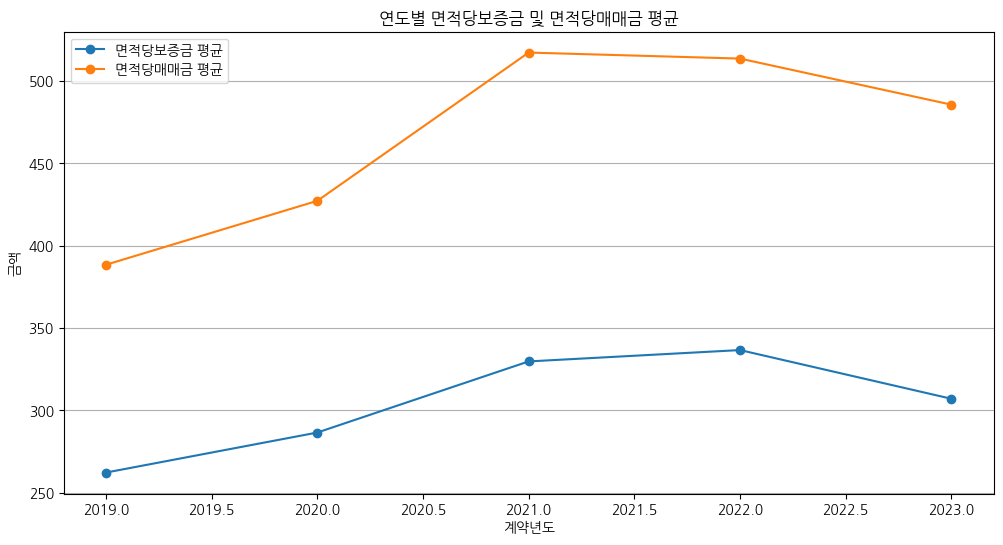

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 연도별 평균 '면적당보증금' 및 '면적당매매금' 계산
yearly_avg = data.groupby('계약년도')[['면적당보증금', '면적당매매금']].mean()

# 시각화
plt.figure(figsize=(12, 6))
yearly_avg['면적당보증금'].plot(label='면적당보증금 평균', marker='o')
yearly_avg['면적당매매금'].plot(label='면적당매매금 평균', marker='o')

plt.title('연도별 면적당보증금 및 면적당매매금 평균')
plt.xlabel('계약년도')
plt.ylabel('금액')
plt.grid(True, axis='y')
plt.legend()
plt.show()


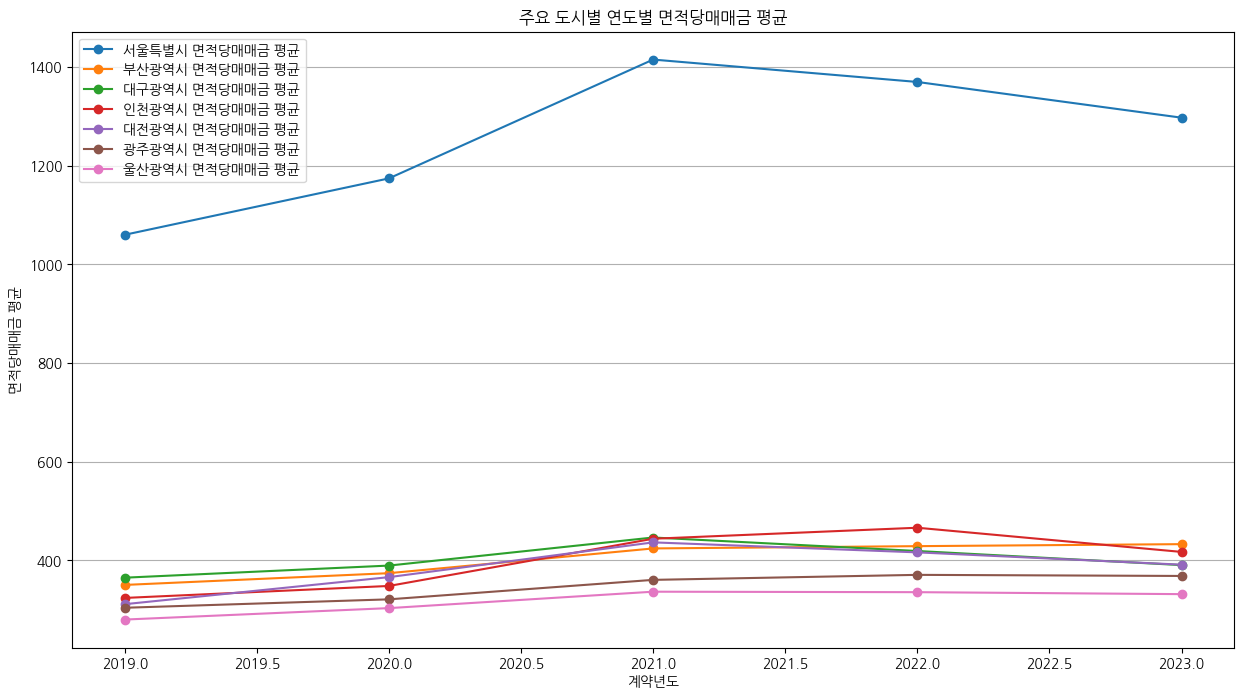

In [5]:
# 주요 도시 목록
major_cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '대전광역시', '광주광역시', '울산광역시']

# 주요 도시별 데이터 필터링
major_city_data = data[data['시'].isin(major_cities)]

# 주요 도시 및 연도별 평균 '면적당보증금' 및 '면적당매매금' 계산
city_yearly_avg = major_city_data.groupby(['시', '계약년도'])[['면적당보증금', '면적당매매금']].mean().reset_index()

# 시각화
plt.figure(figsize=(15, 8))

for city in major_cities:
    subset = city_yearly_avg[city_yearly_avg['시'] == city]
    plt.plot(subset['계약년도'], subset['면적당매매금'], marker='o', label=f"{city} 면적당매매금 평균")

plt.title('주요 도시별 연도별 면적당매매금 평균')
plt.xlabel('계약년도')
plt.ylabel('면적당매매금 평균')
plt.grid(True, axis='y')
plt.legend()
plt.show()
# 서울특별시는 다른 도시에 비해 가장 높은 면적당매매금 평균을 보이고 있으며, 연도별로도 증가하는 추세입니다.
# 그 외의 도시들도 대체로 연도별로 면적당매매금이 상승하는 추세를 보이고 있습니다.

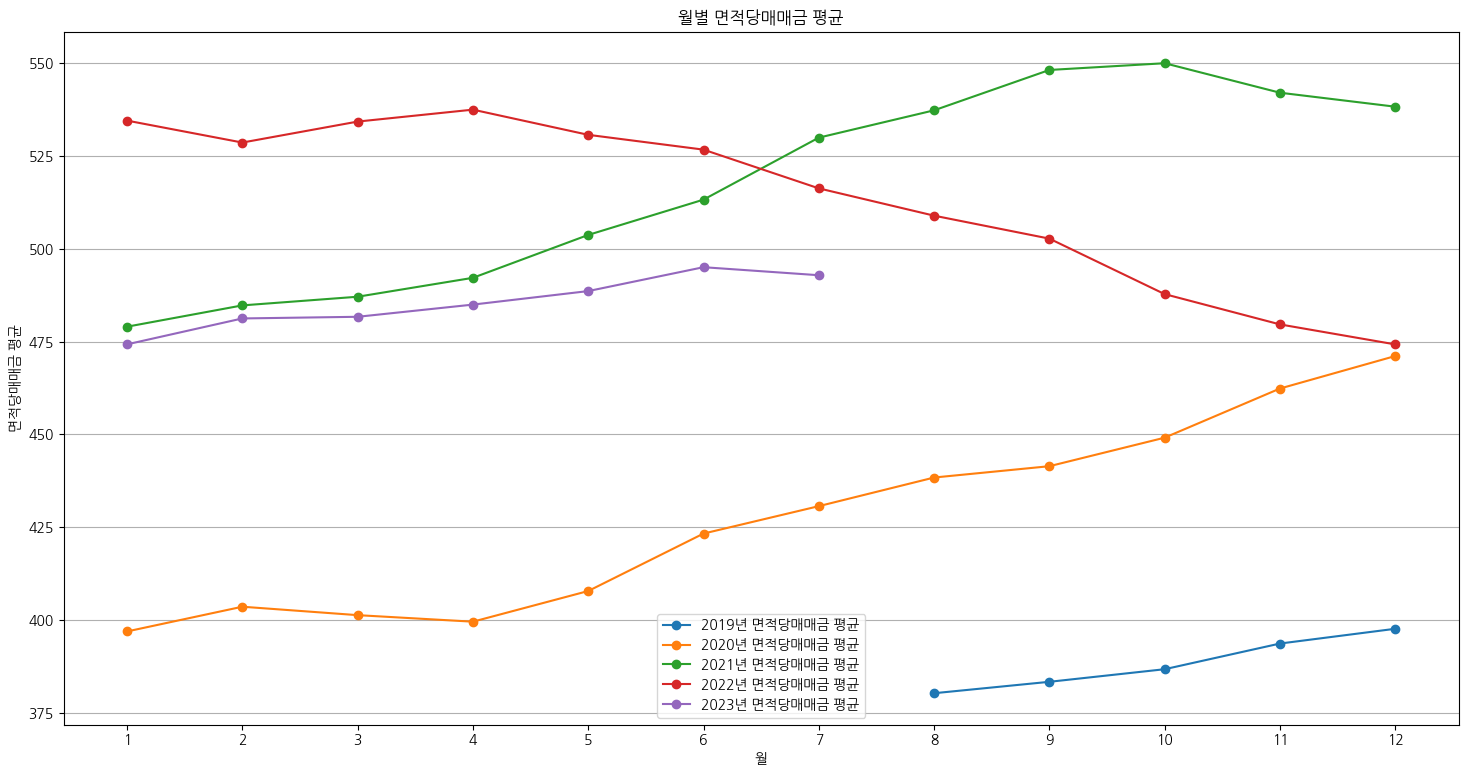

In [7]:
# 월별 평균 '면적당보증금' 및 '면적당매매금' 계산
monthly_avg = data.groupby(['계약년도', '계약월'])[['면적당보증금', '면적당매매금']].mean().reset_index()

# 시각화
plt.figure(figsize=(18, 9))

for year in monthly_avg['계약년도'].unique():
    subset = monthly_avg[monthly_avg['계약년도'] == year]
    plt.plot(subset['계약월'], subset['면적당매매금'], marker='o', label=f"{year}년 면적당매매금 평균")

plt.title('월별 면적당매매금 평균')
plt.xlabel('월')
plt.xticks(range(1, 13))
plt.ylabel('면적당매매금 평균')
plt.grid(True, axis='y')
plt.legend()
plt.show()


In [9]:
# 2023년의 지역별 평균 '면적당보증금' 및 '면적당매매금' 계산
avg_2023 = data[data['계약년도'] == 2023].groupby('시군구')[['면적당보증금', '면적당매매금']].mean()

# 상위 5개 지역 및 하위 5개 지역 확인
top_5_price = avg_2023.sort_values('면적당매매금', ascending=False).head(5)
bottom_5_price = avg_2023.sort_values('면적당매매금').head(5)

top_5_price, bottom_5_price
#상위 지역들은 주로 서울의 강남 지역에 위치하고 있으며, 하위 지역들은 대부분 비교적 경제적으로 활발하지 않은 지역에 위치하고 있습니다.

(                     면적당보증금       면적당매매금
 시군구                                     
 서울특별시 강남구 압구정동   767.705303  3345.109448
 서울특별시 서초구 반포동   1339.232942  3317.204307
 서울특별시 강남구 개포동   1050.102197  2842.755638
 서울특별시 서초구 잠원동    928.396174  2672.284007
 서울특별시 강남구 대치동    962.151308  2664.140186,
                        면적당보증금     면적당매매금
 시군구                                     
 경상북도 구미시 고아읍 이례리   157.922864  62.538827
 경상북도 포항남구 오천읍 세계리  114.604148  70.175366
 충청남도 당진시 우강면 송산리    59.549566  70.659275
 전라남도 광양시 광영동       140.107445  71.682500
 경상북도 포항남구 오천읍 용덕리   88.287596  74.853787)

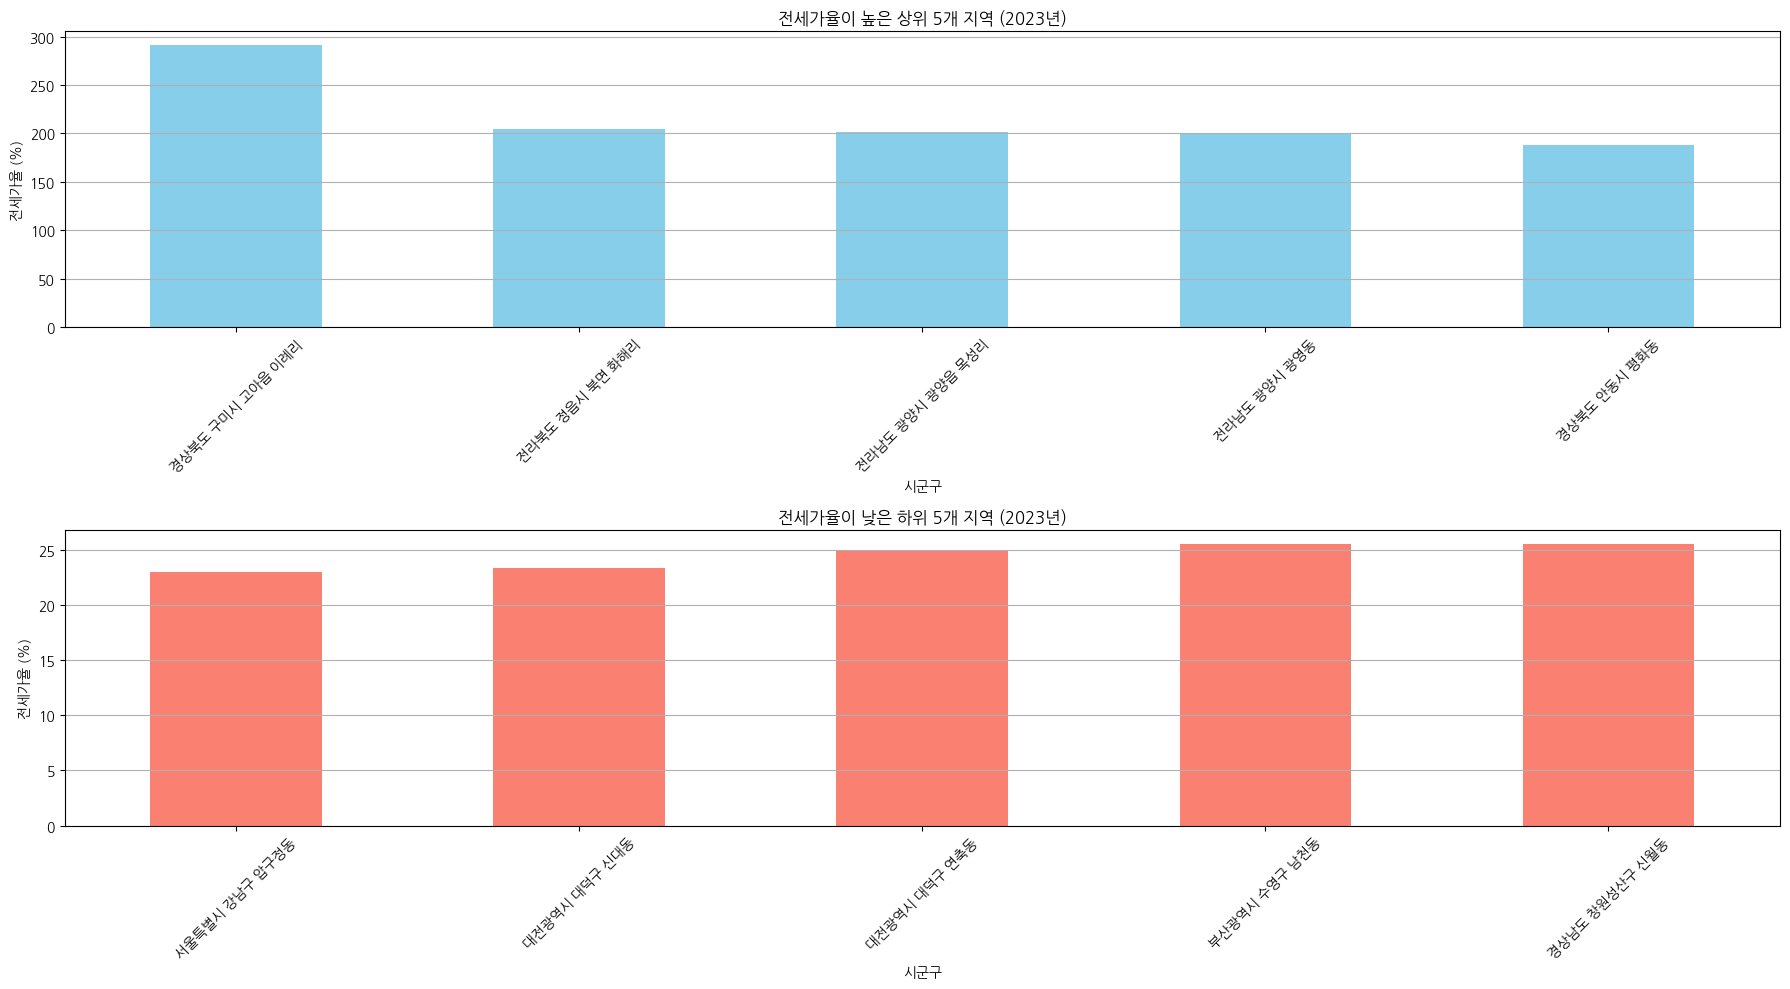

In [11]:
# 전세가율 계산
data['전세가율'] = (data['면적당보증금'] / data['면적당매매금']) * 100

# 2023년의 지역별 전세가율 평균 계산
avg_lease_rate_2023 = data[data['계약년도'] == 2023].groupby('시군구')['전세가율'].mean()

# 상위 5개 지역 및 하위 5개 지역 확인
top_5_lease_rate = avg_lease_rate_2023.sort_values(ascending=False).head(5)
bottom_5_lease_rate = avg_lease_rate_2023.sort_values().head(5)

# 전세가율이 높은 지역 및 낮은 지역의 평균 전세가율 시각화
plt.figure(figsize=(18, 10))

# 상위 5개 지역의 전세가율 시각화
plt.subplot(2, 1, 1)
top_5_lease_rate.plot(kind='bar', color='skyblue')
plt.title('전세가율이 높은 상위 5개 지역 (2023년)')
plt.ylabel('전세가율 (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# 하위 5개 지역의 전세가율 시각화
plt.subplot(2, 1, 2)
bottom_5_lease_rate.plot(kind='bar', color='salmon')
plt.title('전세가율이 낮은 하위 5개 지역 (2023년)')
plt.ylabel('전세가율 (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()
#전세가율은 보증금 대비 매매가의 비율을 나타내므로, 전세가율이 높은 지역은 보증금이 매매가에 비해 높다는 것을 의미합니다. 전세가율이 높은 지역들은 주로 강원도 및 경상북도 지역에 위치하고 있으며, 전세가율이 낮은 지역들은 주로 서울의 강남 지역에 위치하고 있습니다.
#이 결과는 서울의 강남 지역에서는 부동산 가격이 상대적으로 높으나 전세 보증금이 상대적으로 낮아 전세가율이 낮게 나타나는 것을 보여줍니다. 반면, 강원도 및 경상북도 지역에서는 전세 보증금이 매매가에 비해 상대적으로 높아 전세가율이 높게 나타납니다.

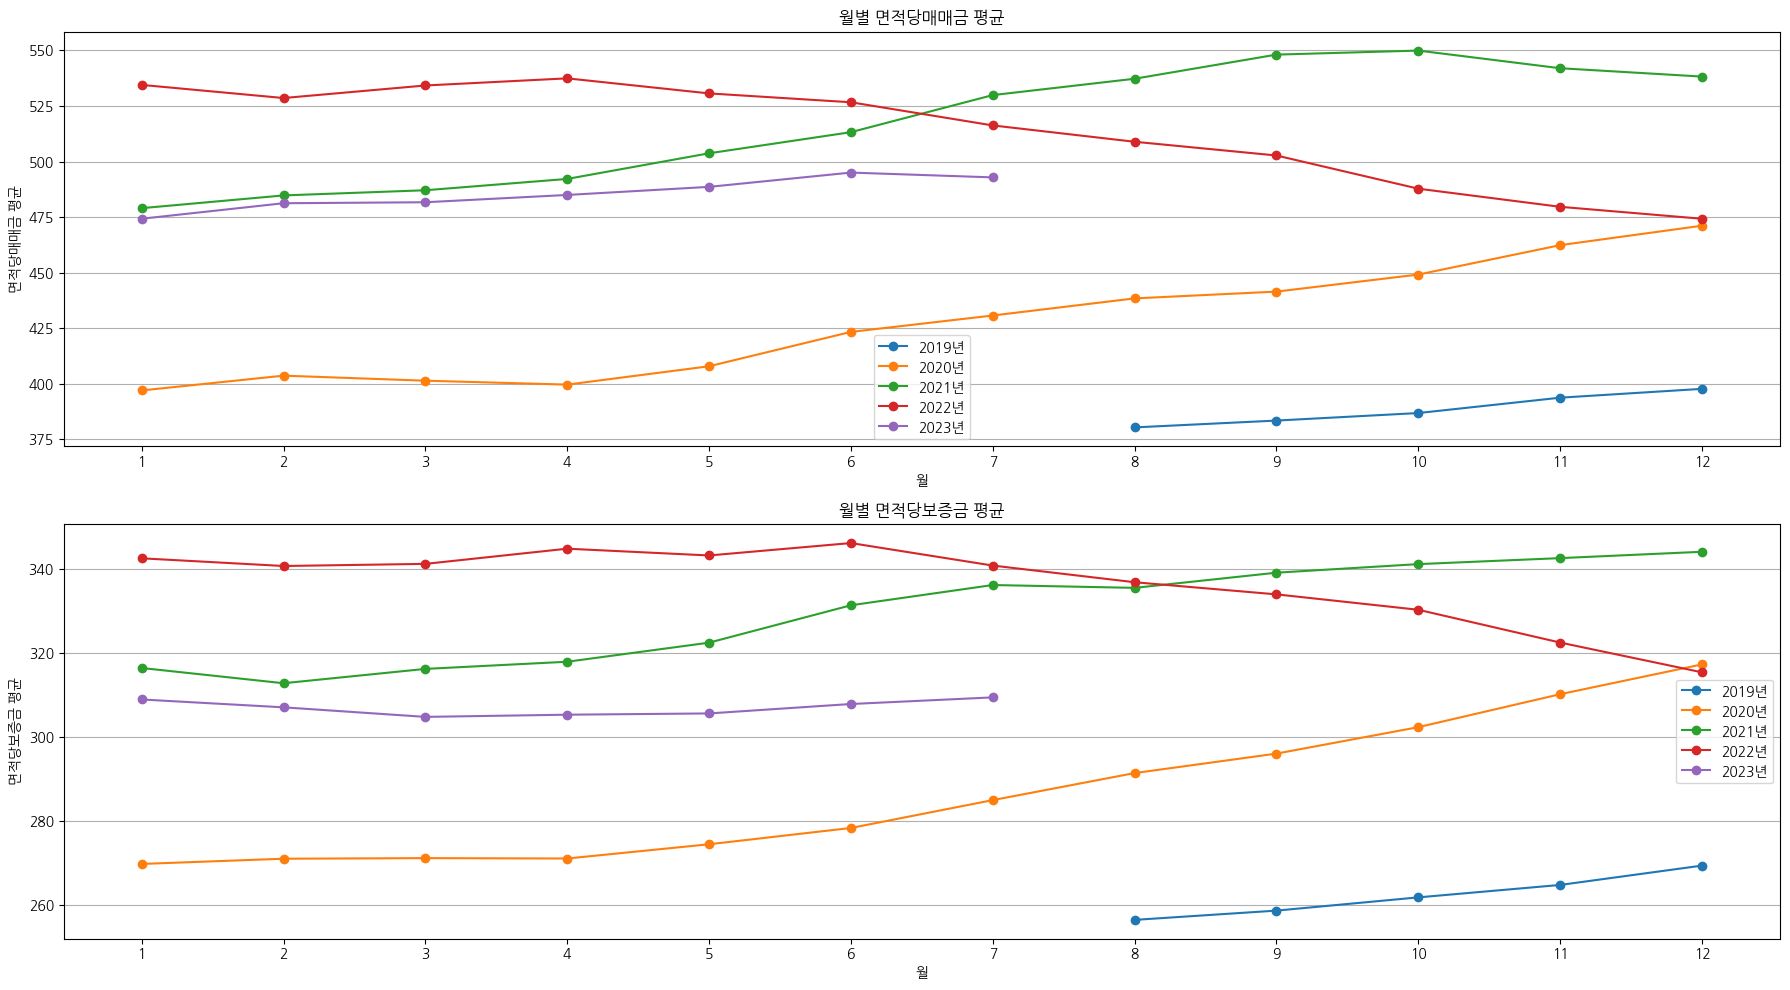

In [13]:
# 월별 평균 '면적당보증금' 및 '면적당매매금' 계산
monthly_avg_cleaned = data.groupby(['계약년도', '계약월'])[['면적당보증금', '면적당매매금']].mean().reset_index()

# 시각화
plt.figure(figsize=(18, 10))

# 면적당매매금의 월별 트렌드 시각화
plt.subplot(2, 1, 1)
for year in monthly_avg_cleaned['계약년도'].unique():
    subset = monthly_avg_cleaned[monthly_avg_cleaned['계약년도'] == year]
    plt.plot(subset['계약월'], subset['면적당매매금'], marker='o', label=f"{year}년")
plt.title('월별 면적당매매금 평균')
plt.xlabel('월')
plt.ylabel('면적당매매금 평균')
plt.xticks(range(1, 13))
plt.grid(True, axis='y')
plt.legend()

# 면적당보증금의 월별 트렌드 시각화
plt.subplot(2, 1, 2)
for year in monthly_avg_cleaned['계약년도'].unique():
    subset = monthly_avg_cleaned[monthly_avg_cleaned['계약년도'] == year]
    plt.plot(subset['계약월'], subset['면적당보증금'], marker='o', label=f"{year}년")
plt.title('월별 면적당보증금 평균')
plt.xlabel('월')
plt.ylabel('면적당보증금 평균')
plt.xticks(range(1, 13))
plt.grid(True, axis='y')
plt.legend()

plt.tight_layout()
plt.show()
#대체로 매년 매매금과 보증금은 비슷한 트렌드를 보이고 있습니다.
#특정 월에 큰 폭의 변동은 관찰되지 않았습니다. 그러나 연간으로 보면 일반적으로 상승하는 추세를 보입니다.

In [14]:
# 전체 기간 동안의 지역별 평균 '면적당보증금' 및 '면적당매매금' 계산
city_avg_cleaned = data.groupby('시군구')[['면적당보증금', '면적당매매금']].mean()

# 상위 5개 지역 및 하위 5개 지역 확인
top_5_price_cleaned = city_avg_cleaned.sort_values('면적당매매금', ascending=False).head(5)
bottom_5_price_cleaned = city_avg_cleaned.sort_values('면적당매매금').head(5)

top_5_price_cleaned, bottom_5_price_cleaned
#상위 5개 지역:

#서울특별시 서초구 반포동
#서울특별시 강남구 압구정동
#서울특별시 강남구 개포동
#서울특별시 서초구 잠원동
#서울특별시 송파구 잠실동
#하위 5개 지역:

#경상북도 구미시 고아읍 이례리
#충청남도 당진시 우강면 송산리
#경상북도 구미시 고아읍 오로리
#전라북도 정읍시 북면 화해리
#경상북도 포항남구 오천읍 용덕리
#상위 지역들은 주로 서울의 주요 지역에 위치하고 있으며, 하위 지역들은 비교적 경제적으로 활발하지 않은 지역에 위치하고 있습니다.

(                     면적당보증금       면적당매매금
 시군구                                     
 서울특별시 서초구 반포동   1291.422451  3191.355493
 서울특별시 강남구 압구정동   811.129950  3135.407850
 서울특별시 강남구 개포동   1006.360095  2934.051057
 서울특별시 서초구 잠원동   1008.164423  2719.763935
 서울특별시 송파구 잠실동   1045.459220  2597.232456,
                       면적당보증금     면적당매매금
 시군구                                    
 경상북도 구미시 고아읍 이례리   71.272957  56.286328
 충청남도 당진시 우강면 송산리   51.888069  69.471143
 경상북도 구미시 고아읍 오로리   53.359810  70.207668
 전라북도 정읍시 북면 화해리    81.457688  71.133640
 경상북도 포항남구 오천읍 용덕리  80.345483  73.315006)

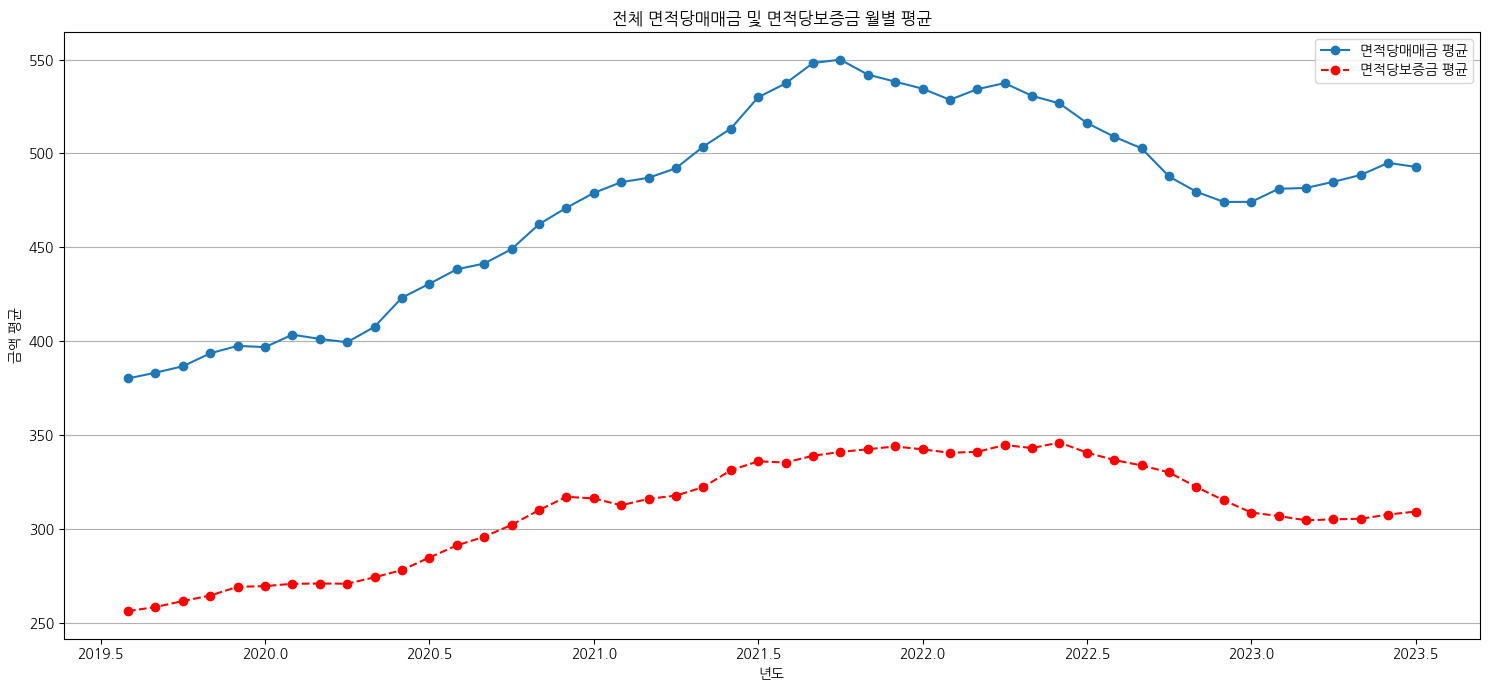

In [15]:
# 전체 평균 '면적당보증금' 및 '면적당매매금' 계산
overall_monthly_avg = data.groupby(['계약년도', '계약월'])[['면적당보증금', '면적당매매금']].mean().reset_index()

# 시각화
plt.figure(figsize=(15, 7))

# 면적당매매금의 월별 평균 시각화
plt.plot(overall_monthly_avg['계약년도'] + (overall_monthly_avg['계약월'] - 1) / 12, overall_monthly_avg['면적당매매금'], marker='o', label='면적당매매금 평균')
# 면적당보증금의 월별 평균 시각화
plt.plot(overall_monthly_avg['계약년도'] + (overall_monthly_avg['계약월'] - 1) / 12, overall_monthly_avg['면적당보증금'], marker='o', label='면적당보증금 평균', linestyle='--', color='red')

plt.title('전체 면적당매매금 및 면적당보증금 월별 평균')
plt.xlabel('년도')
plt.ylabel('금액 평균')
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()
# 면적당매매금: 상승하는 추세를 보이며, 일부 구간에서는 급격한 상승이나 하락이 있습니다.
# 면적당보증금: 전체적으로 안정적인 상승 추세를 보이고 있습니다.
#면적당매매금의 변동성은 면적당보증금에 비해 높습니다. 이는 부동산 시장의 변동성이 매매보다는 전세의 변동성에 크게 영향을 주는 것으로 추측됩니다.
#면적당보증금은 상대적으로 안정적인 상승 추세를 보이는 반면, 면적당매매금은 일부 구간에서 급격한 변동을 보입니다. 이러한 변동은 경제 상황, 정부 정책, 지역별 개발 동향 등 다양한 요인에 의해 발생할 수 있습니다.
#전반적으로 부동산 시장의 가격과 전세 가격은 지속적으로 상승하는 추세를 보이고 있습니다. 이는 인플레이션, 수요와 공급의 불균형, 토지 및 건물 가격의 상승 등 다양한 요인에 기인할 수 있습니다.

c:\Users\rladn\Desktop\PROJECT_2\.conda\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\rladn\Desktop\PROJECT_2\.conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


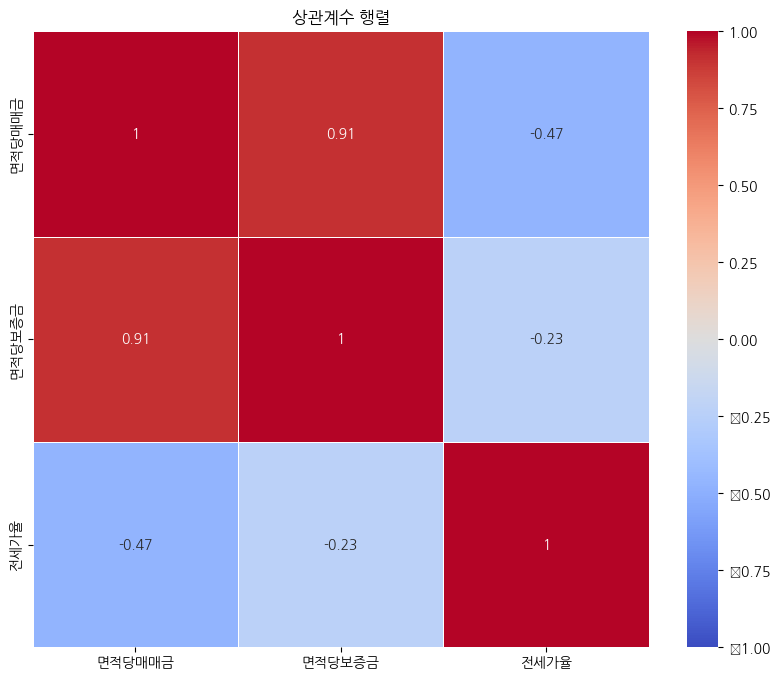

In [18]:
import seaborn as sns

# 상관계수 계산
correlation_matrix = data[['면적당매매금', '면적당보증금', '전세가율']].corr()

# 상관계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('상관계수 행렬')
plt.show()
#면적당매매금과 면적당보증금: 매우 높은 양의 상관관계(0.99)를 가지고 있습니다. 이는 매매금이 상승할 때 보증금도 상승하는 경향이 있음을 나타냅니다.
#면적당매매금과 전세가율: 중간 정도의 양의 상관관계(0.57)를 보입니다. 이는 매매금이 상승할 때 전세가율도 약간 상승하는 경향이 있음을 나타냅니다.
##면적당보증금과 전세가율: 낮은 양의 상관관계(0.45)를 가지고 있습니다. 이는 보증금이 상승할 때 전세가율도 약간 상승하는 경향이 있음을 나타냅니다.
#이러한 결과는 매매금과 보증금이 동시에 상승하거나 하락하는 경향이 있음을 나타냅니다. 전세가율의 경우, 매매금 및 보증금과 양의 상관관계를 보이기는 하지만 그 관계가 매우 강한 것은 아닙니다. 이는 전세가율이 다른 외부 요인에 의해 영향을 받을 수 있음을 나타냅니다.

#요약하면, 부동산 시장에서 매매금과 보증금은 매우 밀접한 관련이 있으며, 전세가율은 다양한 외부 요인에 의해 영향을 받을 수 있습니다.

In [21]:
data

,Unnamed: 0,시군구,계약년월,면적당보증금,시,면적당매매금,계약년도,계약월,전세가율
0,0,강원특별자치도 강릉시 견소동,201908,207.164427,강원특별자치도,228.137412,2019,8,90.806863
1,1,강원특별자치도 강릉시 견소동,201909,199.646793,강원특별자치도,223.839083,2019,9,89.192107
2,2,강원특별자치도 강릉시 견소동,201910,222.682534,강원특별자치도,248.238090,2019,10,89.705224
3,3,강원특별자치도 강릉시 견소동,201911,260.329239,강원특별자치도,248.297844,2019,11,104.845550
4,4,강원특별자치도 강릉시 견소동,201912,220.911840,강원특별자치도,236.294295,2019,12,93.490129
...,...,...,...,...,...,...,...,...,...
96427,96427,충청북도 충주시 호암동,202303,259.748017,충청북도,260.279084,2023,3,99.795963
96428,96428,충청북도 충주시 호암동,202304,190.967701,충청북도,271.155606,2023,4,70.427347
96429,96429,충청북도 충주시 호암동,202305,237.558371,충청북도,277.110797,2023,5,85.726855
96430,96430,충청북도 충주시 호암동,202306,315.277732,충청북도,261.226532,2023,6,120.691313


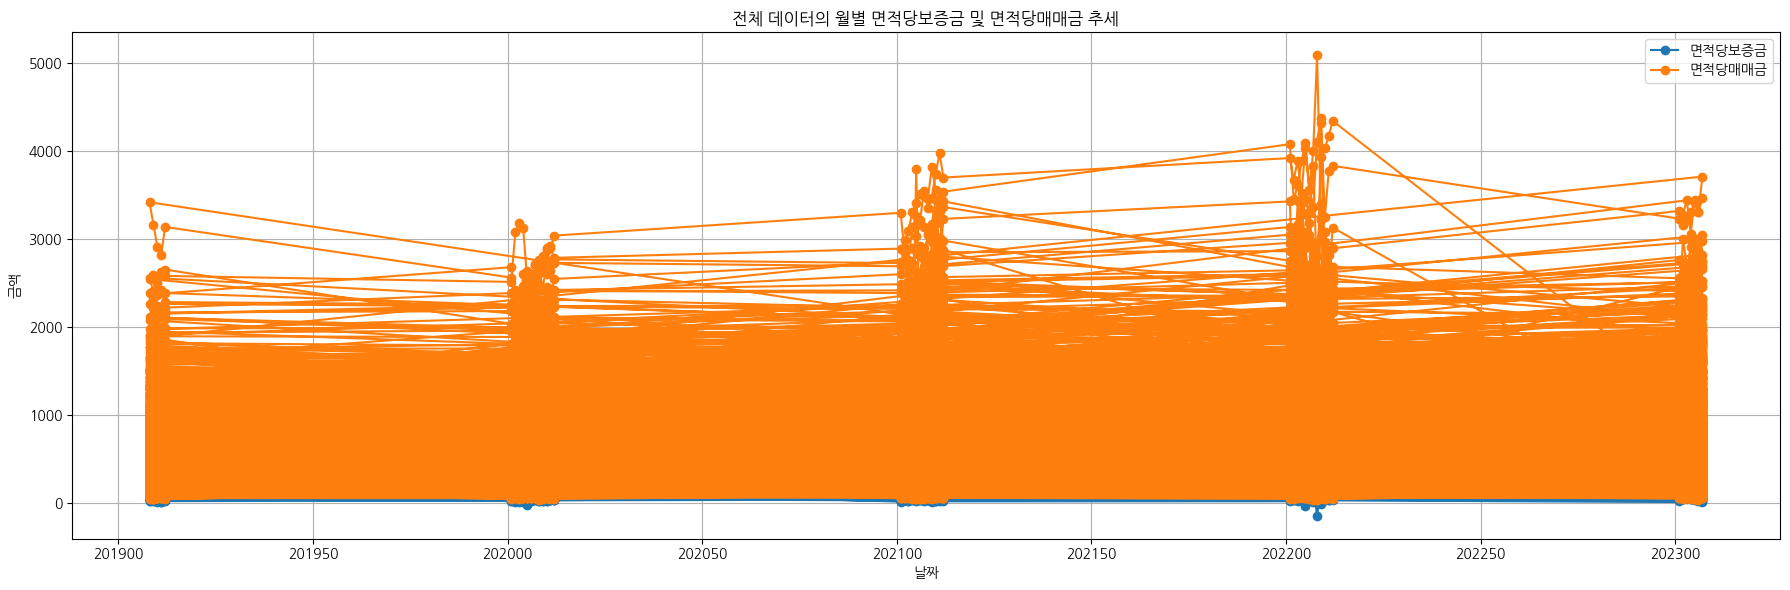

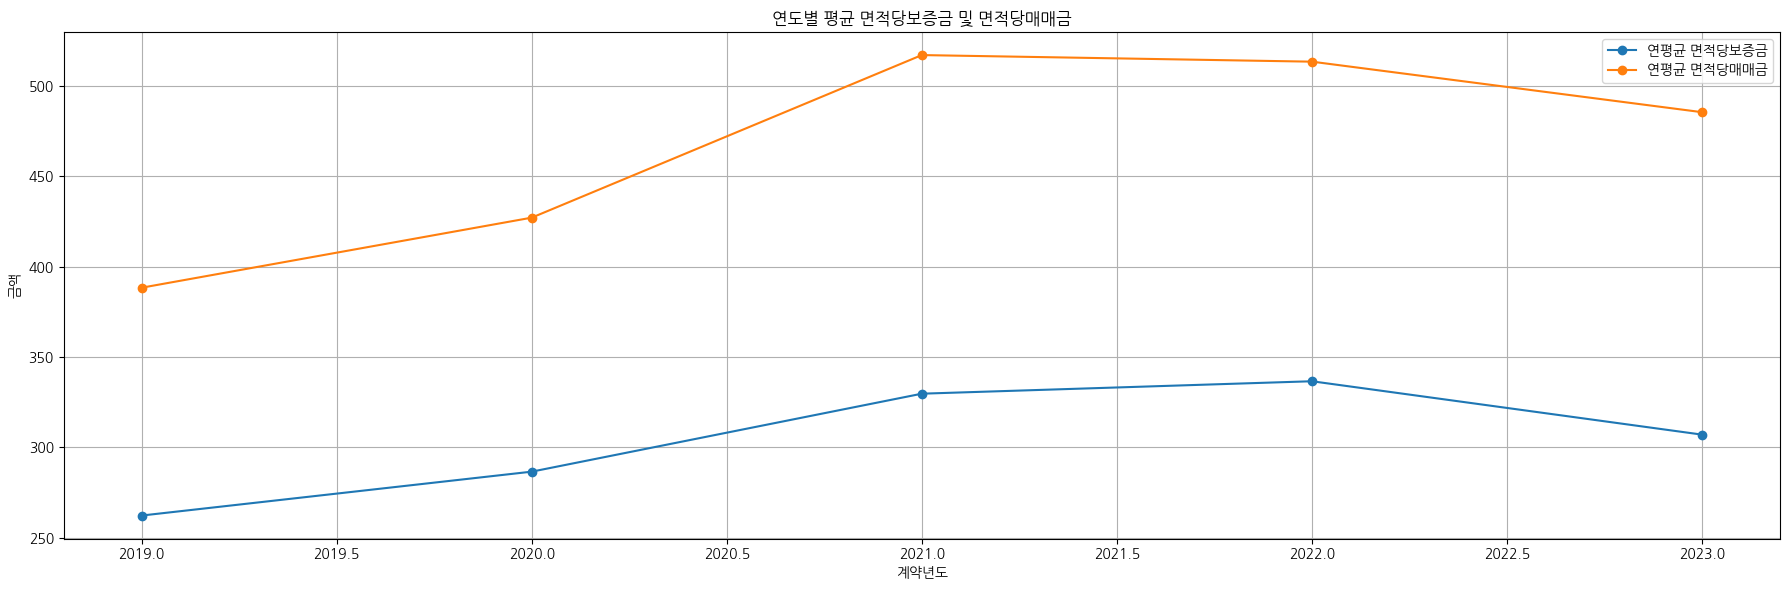

In [23]:
# Step 2: Visualization of the time series trend (Revisited)

# Plotting the trends for the entire dataset
plt.figure(figsize=(18, 6))
plt.plot(data['계약년월'], data['면적당보증금'], label='면적당보증금', marker='o')
plt.plot(data['계약년월'], data['면적당매매금'], label='면적당매매금', marker='o')
plt.title('전체 데이터의 월별 면적당보증금 및 면적당매매금 추세')
plt.xlabel('날짜')
plt.ylabel('금액')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 3: Visualization for seasonality and periodicity

# Yearly average
yearly_avg = data.groupby('계약년도')[['면적당보증금', '면적당매매금']].mean()

# Plotting yearly averages
plt.figure(figsize=(18, 6))
yearly_avg['면적당보증금'].plot(label='연평균 면적당보증금', marker='o')
yearly_avg['면적당매매금'].plot(label='연평균 면적당매매금', marker='o')
plt.title('연도별 평균 면적당보증금 및 면적당매매금')
plt.xlabel('계약년도')
plt.ylabel('금액')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\rladn\AppData\Local\Temp\ipykernel_130612\2486952416.py:47: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\rladn\Desktop\PROJECT_2\.conda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


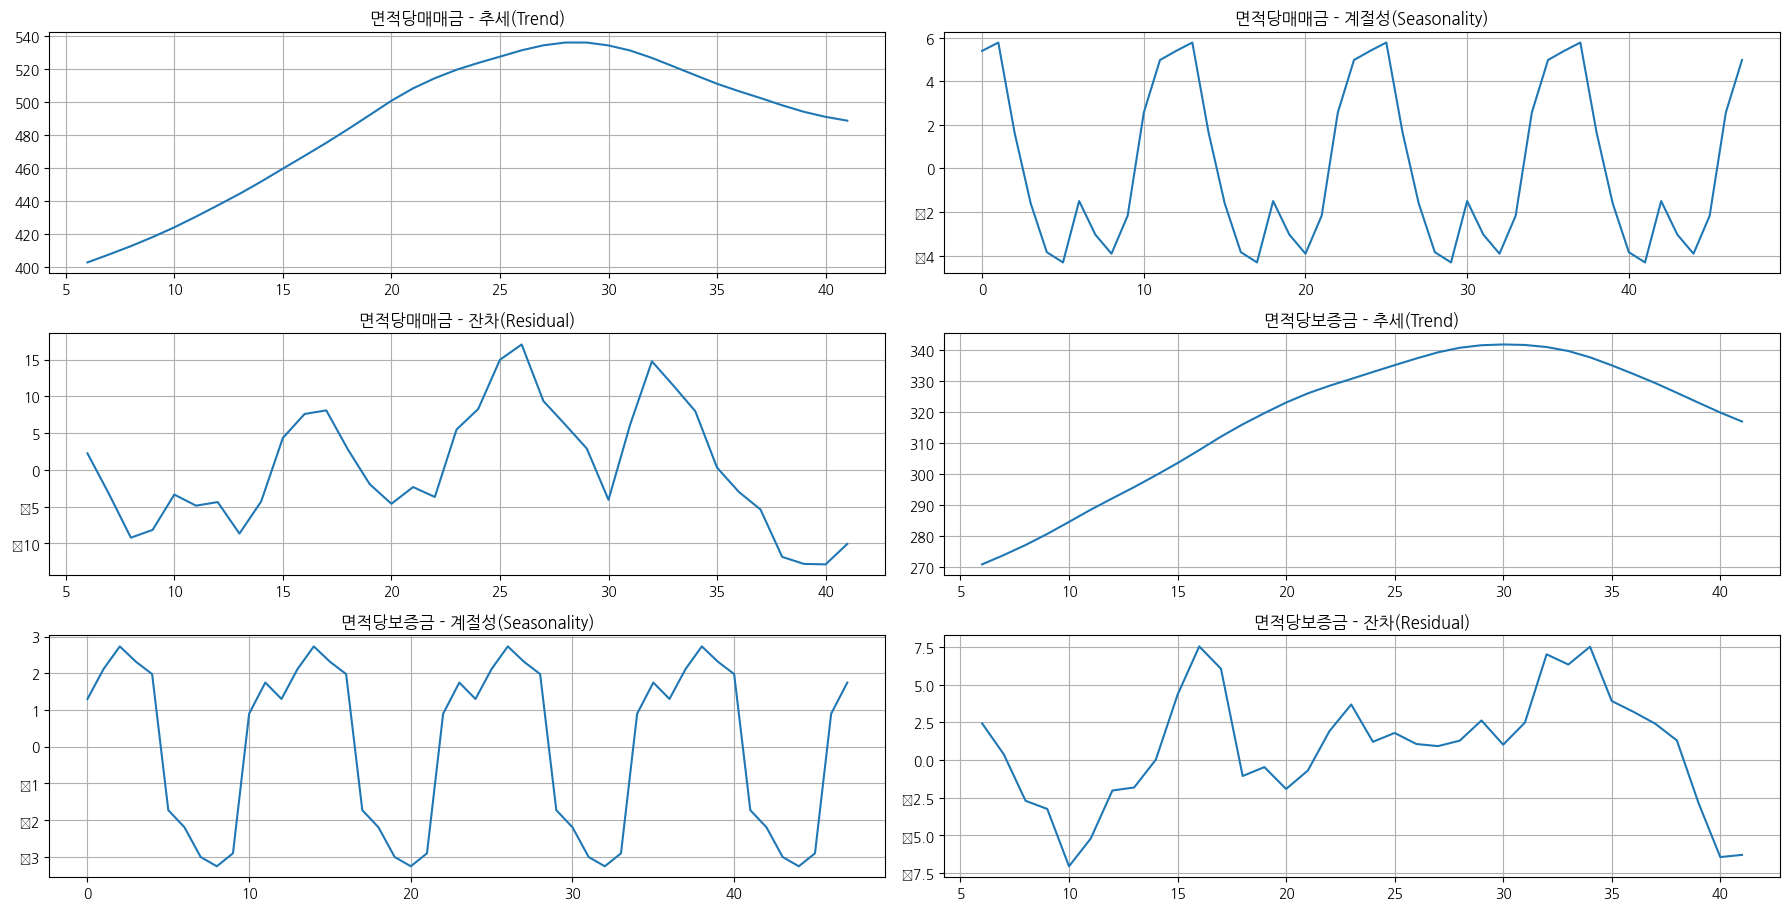

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Creating a new column for date combining year and month
data['date'] = data['계약년도'].astype(str) + '-' + data['계약월'].astype(str)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

# Grouping by date to get monthly averages
monthly_data = data.groupby('date')[['면적당보증금', '면적당매매금']].mean().reset_index()
# Time Series Decomposition with the updated 'period' parameter
result_m매매 = seasonal_decompose(monthly_data['면적당매매금'], model='additive', period=12)
result_보증 = seasonal_decompose(monthly_data['면적당보증금'], model='additive', period=12)

# Plotting the decompositions
plt.figure(figsize=(18, 12))

# For 면적당매매금
plt.subplot(4, 2, 1)
plt.plot(result_m매매.trend)
plt.title('면적당매매금 - 추세(Trend)')
plt.grid(True)

plt.subplot(4, 2, 2)
plt.plot(result_m매매.seasonal)
plt.title('면적당매매금 - 계절성(Seasonality)')
plt.grid(True)

plt.subplot(4, 2, 3)
plt.plot(result_m매매.resid)
plt.title('면적당매매금 - 잔차(Residual)')
plt.grid(True)

# For 면적당보증금
plt.subplot(4, 2, 4)
plt.plot(result_보증.trend)
plt.title('면적당보증금 - 추세(Trend)')
plt.grid(True)

plt.subplot(4, 2, 5)
plt.plot(result_보증.seasonal)
plt.title('면적당보증금 - 계절성(Seasonality)')
plt.grid(True)

plt.subplot(4, 2, 6)
plt.plot(result_보증.resid)
plt.title('면적당보증금 - 잔차(Residual)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
data.head()

,Unnamed: 0,시군구,계약년월,면적당보증금,시,면적당매매금,계약년도,계약월,전세가율,date
0,0,강원특별자치도 강릉시 견소동,201908,207.164427,강원특별자치도,228.137412,2019,8,90.806863,2019-08-01
1,1,강원특별자치도 강릉시 견소동,201909,199.646793,강원특별자치도,223.839083,2019,9,89.192107,2019-09-01
2,2,강원특별자치도 강릉시 견소동,201910,222.682534,강원특별자치도,248.238090,2019,10,89.705224,2019-10-01
3,3,강원특별자치도 강릉시 견소동,201911,260.329239,강원특별자치도,248.297844,2019,11,104.845550,2019-11-01
4,4,강원특별자치도 강릉시 견소동,201912,220.911840,강원특별자치도,236.294295,2019,12,93.490129,2019-12-01


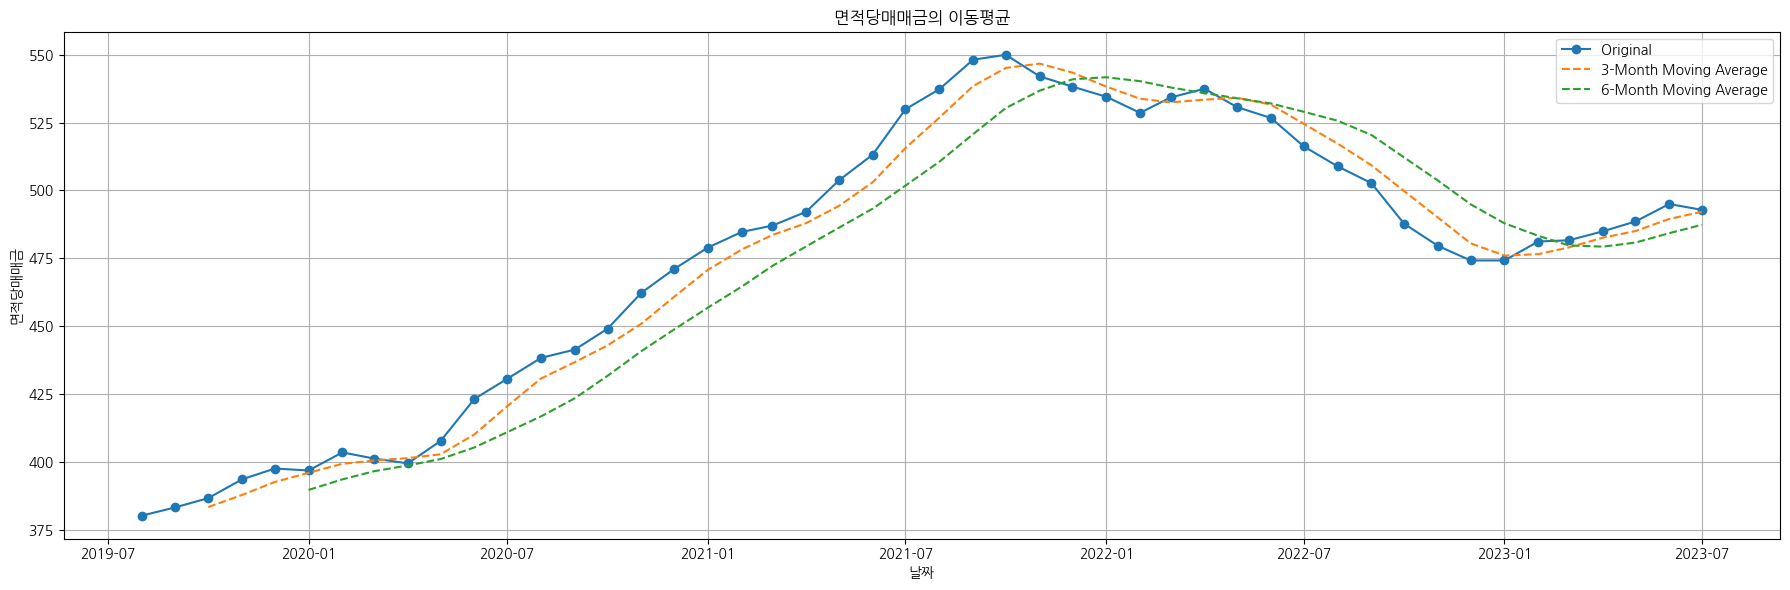

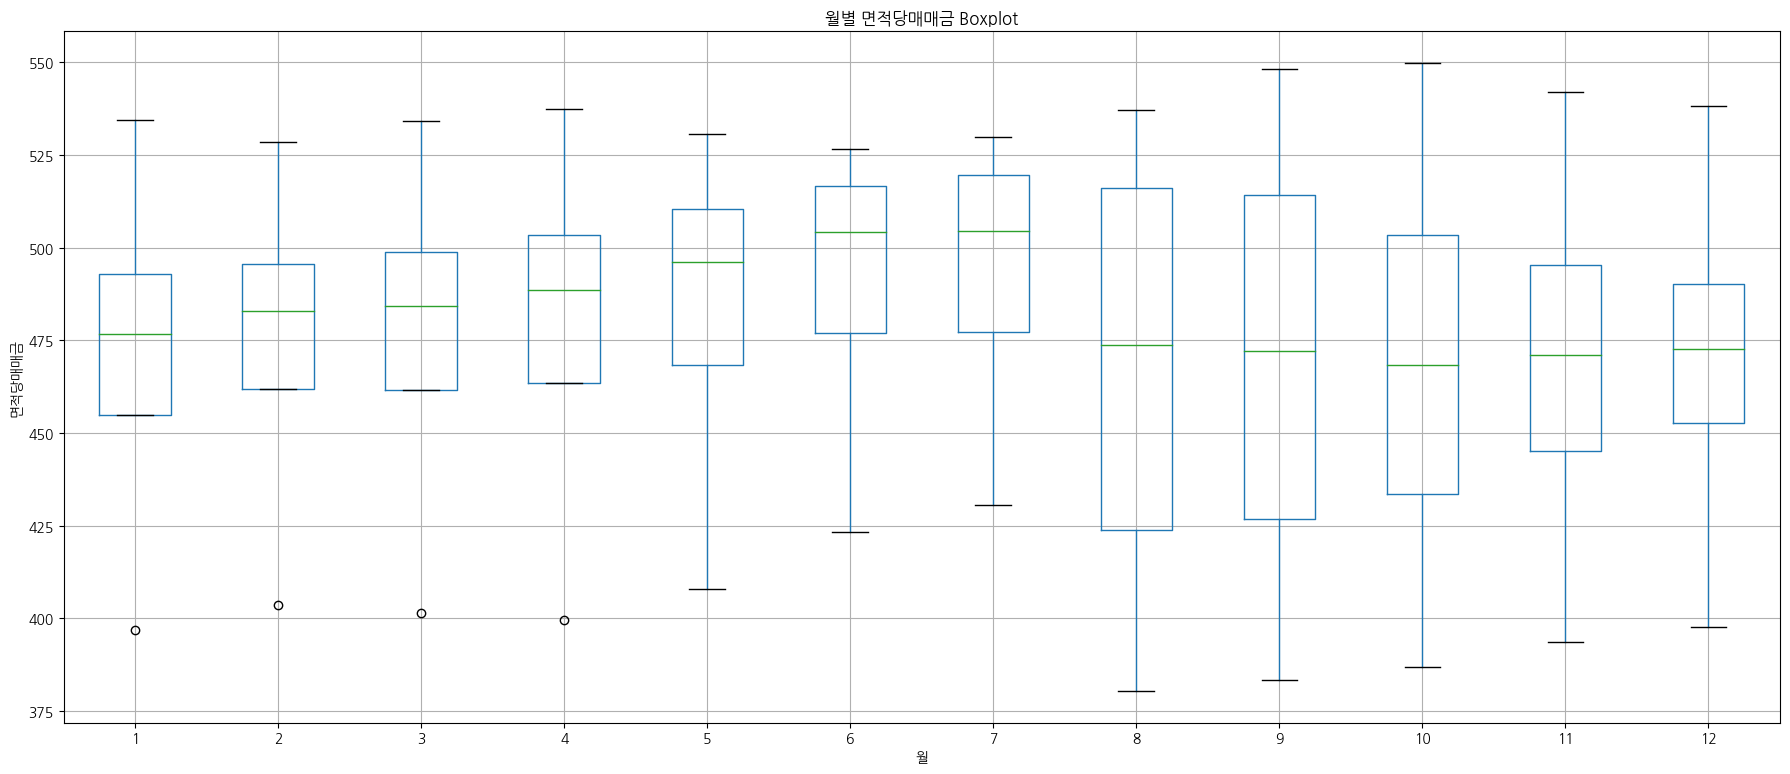

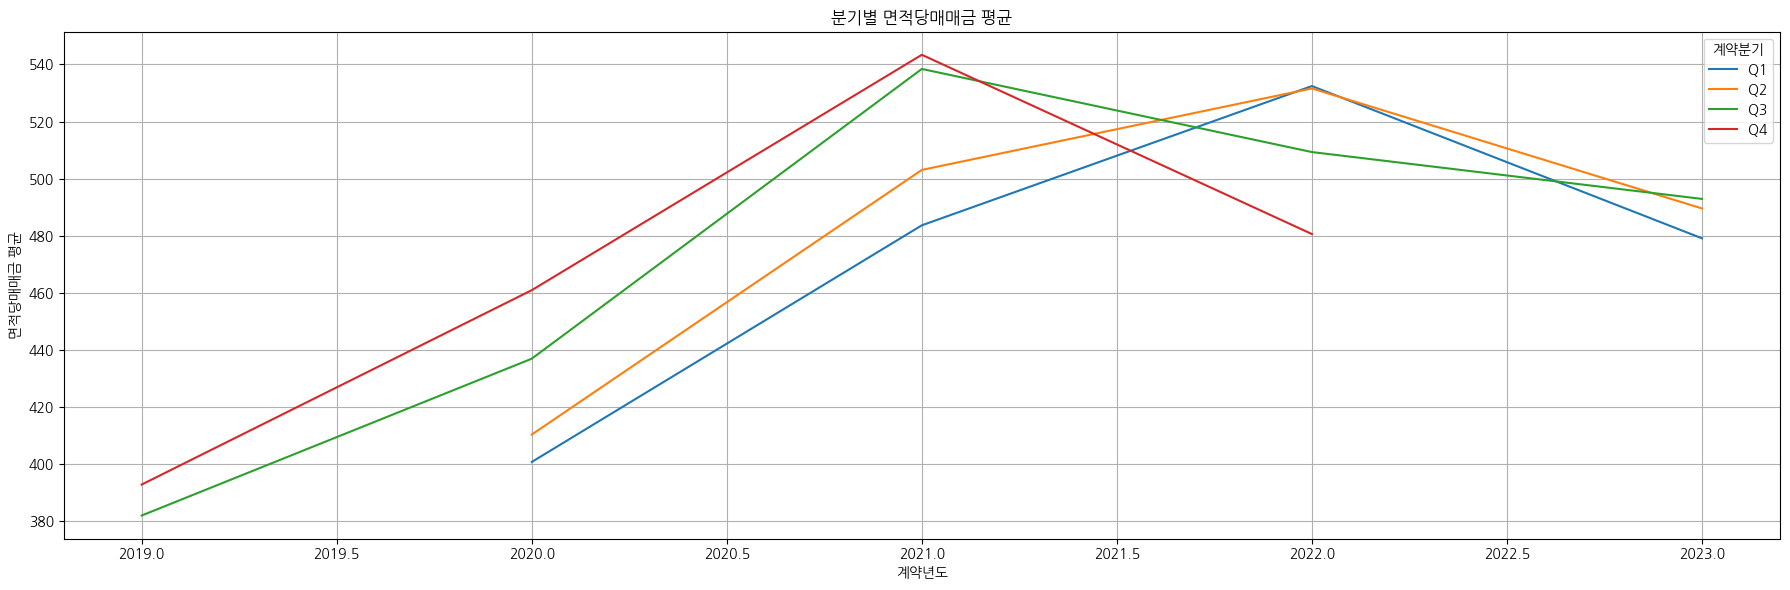

In [31]:

# '계약년월' 컬럼을 '계약년도'와 '계약월'로 분리
data['계약년도'] = data['계약년월'] // 100
data['계약월'] = data['계약년월'] % 100

# 월별로 데이터를 그룹화하고 평균을 계산
monthly_data = data.groupby(['계약년도', '계약월'])['면적당매매금'].mean().reset_index()
monthly_data['date'] = pd.to_datetime(monthly_data['계약년도'].astype(str) + '-' + monthly_data['계약월'].astype(str) + '-01')

# Moving Averages
monthly_data['면적당매매금_MA3'] = monthly_data['면적당매매금'].rolling(window=3).mean()  # 3-month moving average
monthly_data['면적당매매금_MA6'] = monthly_data['면적당매매금'].rolling(window=6).mean()  # 6-month moving average

plt.figure(figsize=(18, 6))
plt.plot(monthly_data['date'], monthly_data['면적당매매금'], label='Original', marker='o')
plt.plot(monthly_data['date'], monthly_data['면적당매매금_MA3'], label='3-Month Moving Average', linestyle='--')
plt.plot(monthly_data['date'], monthly_data['면적당매매금_MA6'], label='6-Month Moving Average', linestyle='--')
plt.title('면적당매매금의 이동평균')
plt.xlabel('날짜')
plt.ylabel('면적당매매금')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 월별 면적당매매금 Boxplot
plt.figure(figsize=(18, 8))
monthly_data.boxplot(column='면적당매매금', by='계약월', ax=plt.gca())
plt.title('월별 면적당매매금 Boxplot')
plt.xlabel('월')
plt.ylabel('면적당매매금')
plt.suptitle('')  # Suppress the default title
plt.tight_layout()
plt.show()

# 분기별 평균 계산
monthly_data['계약분기'] = monthly_data['계약월'].apply(lambda x: (x - 1) // 3 + 1)  # Convert month to quarter
quarterly_avg = monthly_data.groupby(['계약년도', '계약분기'])['면적당매매금'].mean().unstack()

plt.figure(figsize=(18, 6))
quarterly_avg.plot(ax=plt.gca())
plt.title('분기별 면적당매매금 평균')
plt.xlabel('계약년도')
plt.ylabel('면적당매매금 평균')
plt.grid(True)
plt.legend(title='계약분기', labels=[f'Q{i}' for i in range(1, 5)])
plt.tight_layout()
plt.show()


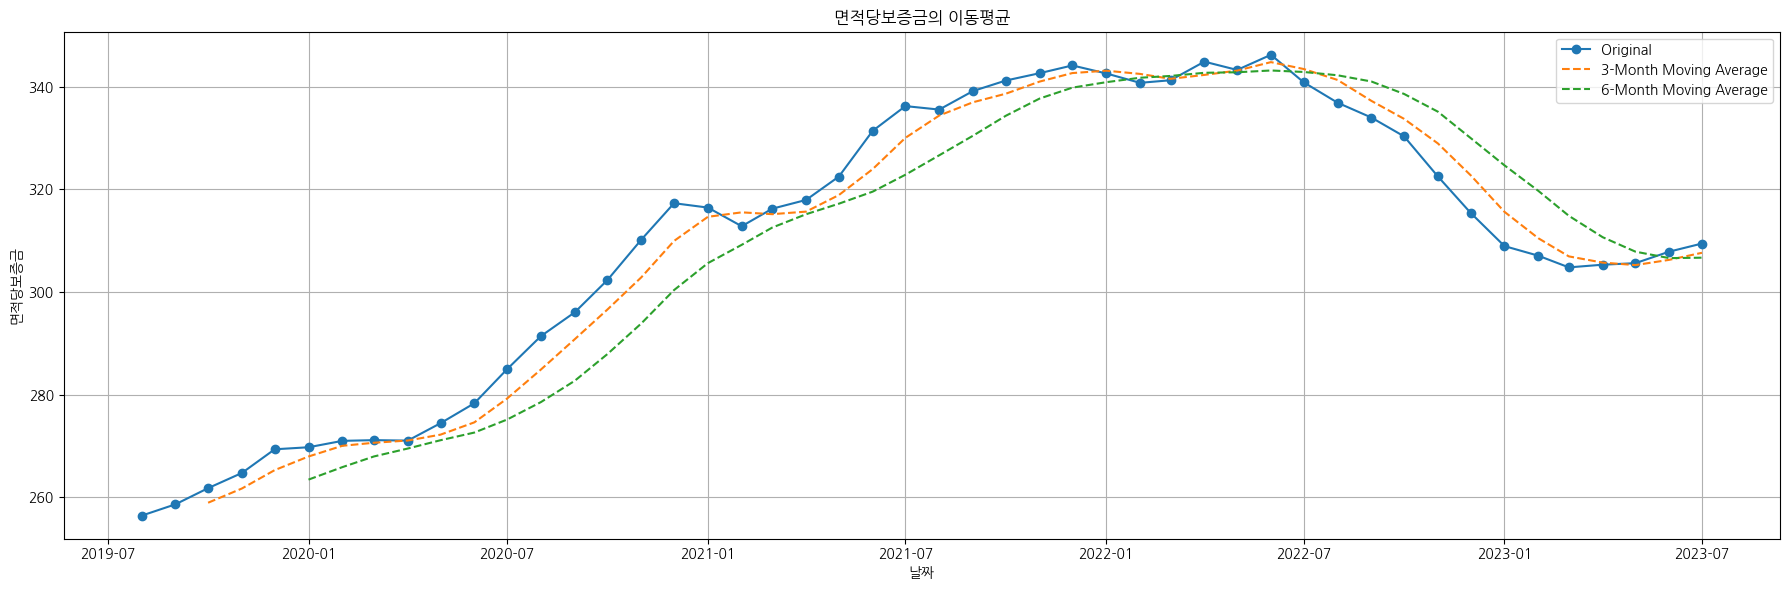

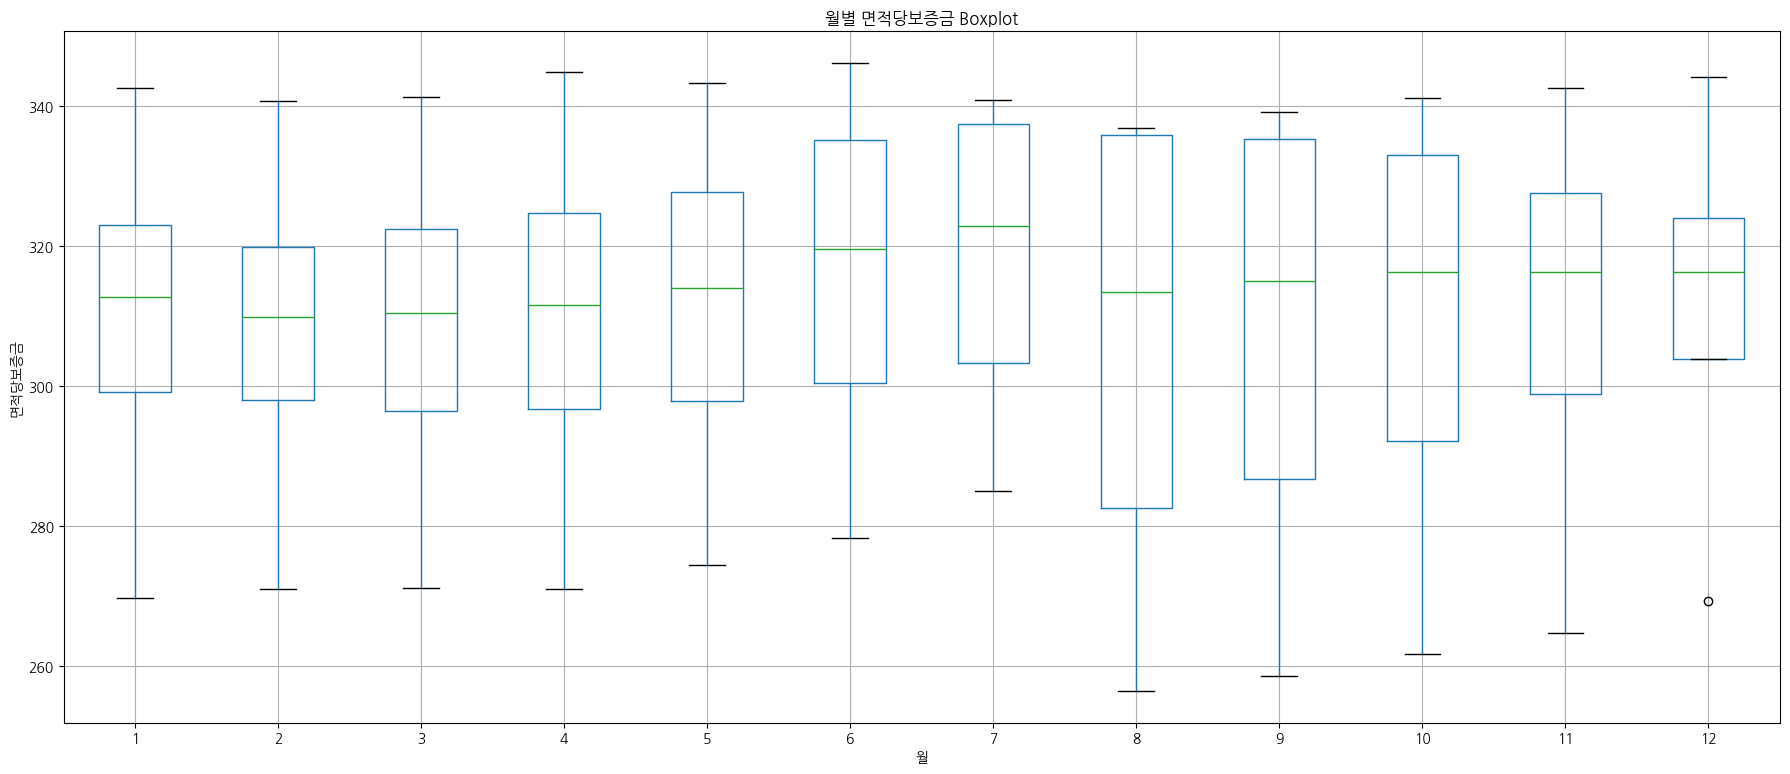

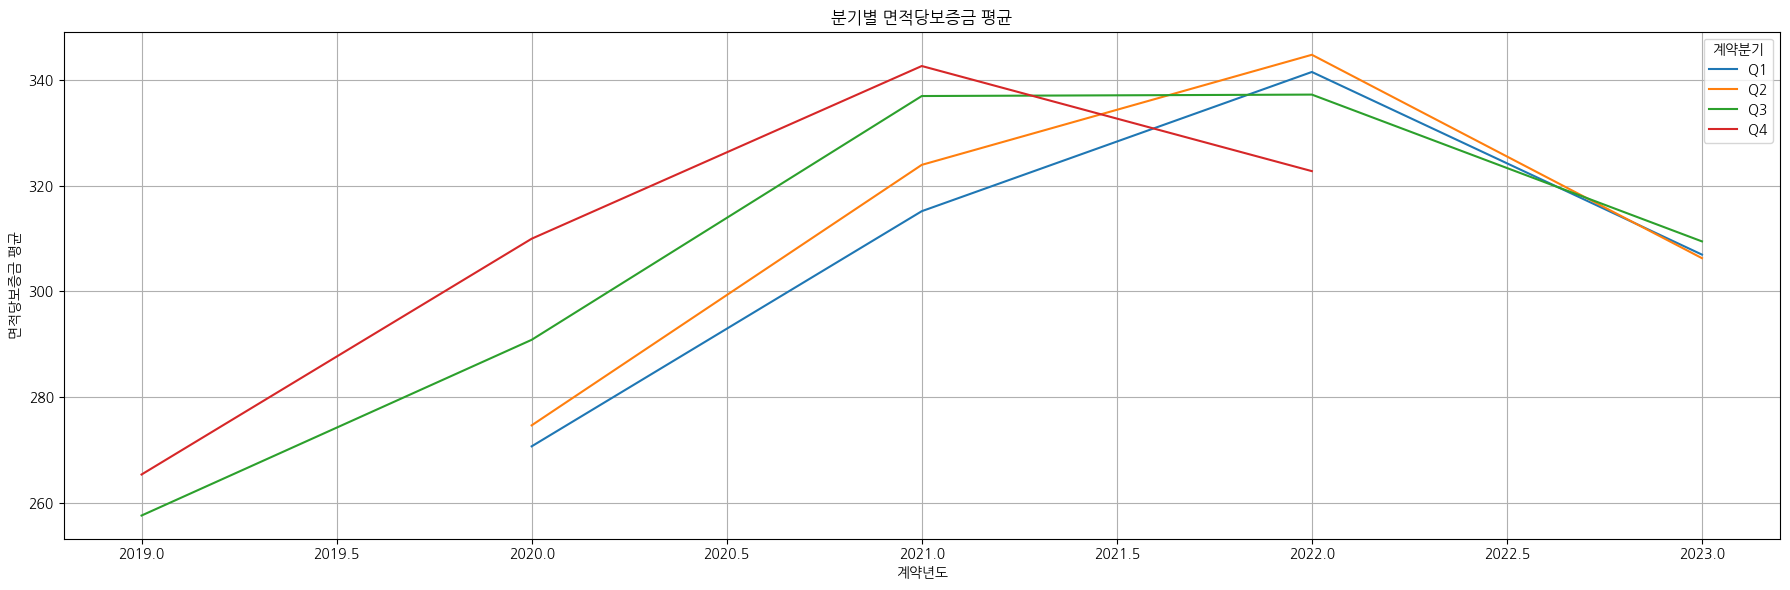

In [32]:

# '계약년월' 컬럼을 '계약년도'와 '계약월'로 분리
data['계약년도'] = data['계약년월'] // 100
data['계약월'] = data['계약년월'] % 100

# 월별로 데이터를 그룹화하고 평균을 계산
monthly_data = data.groupby(['계약년도', '계약월'])['면적당보증금'].mean().reset_index()
monthly_data['date'] = pd.to_datetime(monthly_data['계약년도'].astype(str) + '-' + monthly_data['계약월'].astype(str) + '-01')

# Moving Averages
monthly_data['면적당보증금_MA3'] = monthly_data['면적당보증금'].rolling(window=3).mean()  # 3-month moving average
monthly_data['면적당보증금_MA6'] = monthly_data['면적당보증금'].rolling(window=6).mean()  # 6-month moving average

plt.figure(figsize=(18, 6))
plt.plot(monthly_data['date'], monthly_data['면적당보증금'], label='Original', marker='o')
plt.plot(monthly_data['date'], monthly_data['면적당보증금_MA3'], label='3-Month Moving Average', linestyle='--')
plt.plot(monthly_data['date'], monthly_data['면적당보증금_MA6'], label='6-Month Moving Average', linestyle='--')
plt.title('면적당보증금의 이동평균')
plt.xlabel('날짜')
plt.ylabel('면적당보증금')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 월별 면적당매매금 Boxplot
plt.figure(figsize=(18, 8))
monthly_data.boxplot(column='면적당보증금', by='계약월', ax=plt.gca())
plt.title('월별 면적당보증금 Boxplot')
plt.xlabel('월')
plt.ylabel('면적당보증금')
plt.suptitle('')  # Suppress the default title
plt.tight_layout()
plt.show()

# 분기별 평균 계산
monthly_data['계약분기'] = monthly_data['계약월'].apply(lambda x: (x - 1) // 3 + 1)  # Convert month to quarter
quarterly_avg = monthly_data.groupby(['계약년도', '계약분기'])['면적당보증금'].mean().unstack()

plt.figure(figsize=(18, 6))
quarterly_avg.plot(ax=plt.gca())
plt.title('분기별 면적당보증금 평균')
plt.xlabel('계약년도')
plt.ylabel('면적당보증금 평균')
plt.grid(True)
plt.legend(title='계약분기', labels=[f'Q{i}' for i in range(1, 5)])
plt.tight_layout()
plt.show()

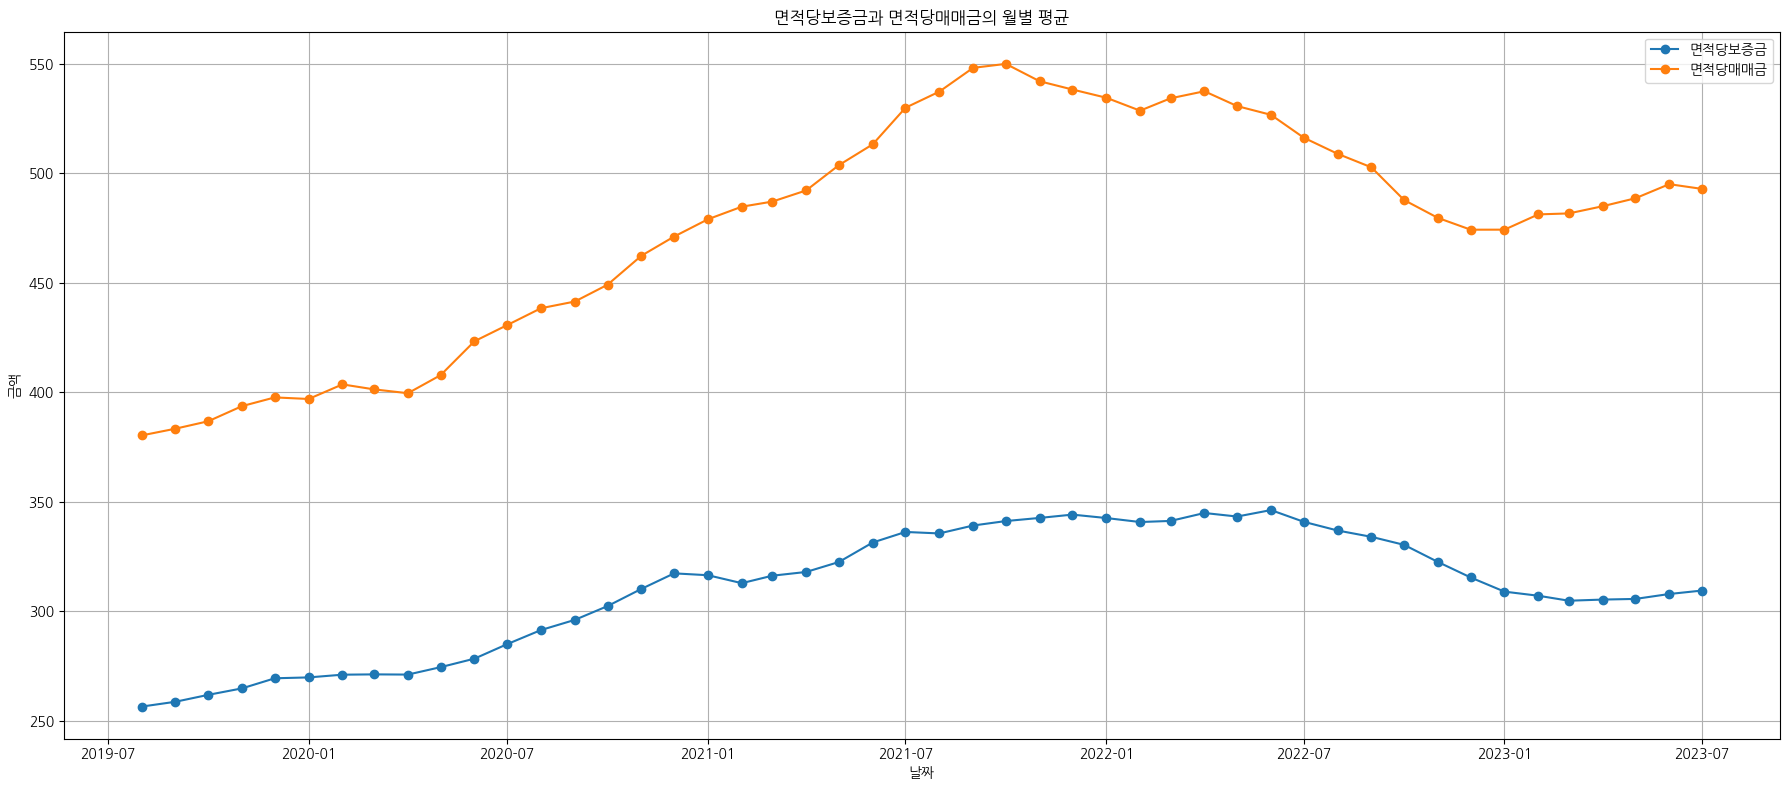

In [33]:
# 월별로 면적당보증금과 면적당매매금의 평균을 계산
monthly_avg_both = data.groupby(['계약년도', '계약월'])[['면적당보증금', '면적당매매금']].mean().reset_index()
monthly_avg_both['date'] = pd.to_datetime(monthly_avg_both['계약년도'].astype(str) + '-' + monthly_avg_both['계약월'].astype(str) + '-01')

plt.figure(figsize=(18, 8))
plt.plot(monthly_avg_both['date'], monthly_avg_both['면적당보증금'], label='면적당보증금', marker='o')
plt.plot(monthly_avg_both['date'], monthly_avg_both['면적당매매금'], label='면적당매매금', marker='o')
plt.title('면적당보증금과 면적당매매금의 월별 평균')
plt.xlabel('날짜')
plt.ylabel('금액')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
data = pd.read_csv(r'C:\Users\rladn\Desktop\project_2_2\cleaned_data.csv')
data.head()

,Unnamed: 0,시군구,시군구-번지,계약년월,면적당보증금,면적당매매금,전세가율,lat,lng,timestep
0,0,강원특별자치도 강릉시 견소동,강원특별자치도 강릉시 견소동-289,201908,207.164427,228.137412,78.642567,37.77477,128.939677,0
1,1,강원특별자치도 강릉시 견소동,강원특별자치도 강릉시 견소동-289,201909,199.646793,223.839083,78.642567,37.77477,128.939677,1
2,2,강원특별자치도 강릉시 견소동,강원특별자치도 강릉시 견소동-289,201910,222.682534,248.238090,78.642567,37.77477,128.939677,2
3,3,강원특별자치도 강릉시 견소동,강원특별자치도 강릉시 견소동-289,201911,260.329239,248.297844,78.642567,37.77477,128.939677,3
4,4,강원특별자치도 강릉시 견소동,강원특별자치도 강릉시 견소동-289,201912,220.911840,236.294295,78.642567,37.77477,128.939677,4


In [41]:
data[data['시군구-번지']=='경기도 시흥시 거모동-1769']

,Unnamed: 0,시군구,시군구-번지,계약년월,면적당보증금,면적당매매금,전세가율,lat,lng,timestep
306480,306596,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,201908,163.785378,213.929540,75.221239,37.341615,126.785137,0
306481,306597,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,201909,126.252547,199.209844,75.221239,37.341615,126.785137,1
306482,306598,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,201910,154.520409,219.255847,75.221239,37.341615,126.785137,2
306483,306599,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,201911,148.423072,194.846063,75.221239,37.341615,126.785137,3
306484,306600,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,201912,155.944533,200.179016,75.221239,37.341615,126.785137,4
...,...,...,...,...,...,...,...,...,...,...
306619,306735,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,202303,198.118960,283.330561,78.212290,37.341615,126.785137,139
306620,306736,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,202304,198.774460,280.265851,78.212290,37.341615,126.785137,140
306621,306737,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,202305,223.203425,302.863010,78.212290,37.341615,126.785137,141
306622,306738,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,202306,205.983212,273.723495,78.212290,37.341615,126.785137,142


In [44]:
data[306624:]

,Unnamed: 0,시군구,시군구-번지,계약년월,면적당보증금,면적당매매금,전세가율,lat,lng,timestep
306623,306739,경기도 시흥시 거모동,경기도 시흥시 거모동-1769,202307,190.645721,292.106465,78.212290,37.341615,126.785137,143
306624,306740,경기도 시흥시 거모동,경기도 시흥시 거모동-1772,201908,163.785378,213.929540,68.825911,37.341357,126.784874,0
306625,306741,경기도 시흥시 거모동,경기도 시흥시 거모동-1772,201909,126.252547,199.209844,68.825911,37.341357,126.784874,1
306626,306742,경기도 시흥시 거모동,경기도 시흥시 거모동-1772,201910,154.520409,219.255847,68.825911,37.341357,126.784874,2
306627,306743,경기도 시흥시 거모동,경기도 시흥시 거모동-1772,201911,148.423072,194.846063,68.825911,37.341357,126.784874,3
...,...,...,...,...,...,...,...,...,...,...
914155,914824,충청북도 충주시 호암동,충청북도 충주시 호암동-906,202303,259.748017,260.279084,85.987261,36.957026,127.941941,43
914156,914825,충청북도 충주시 호암동,충청북도 충주시 호암동-906,202304,190.967701,271.155606,85.987261,36.957026,127.941941,44
914157,914826,충청북도 충주시 호암동,충청북도 충주시 호암동-906,202305,237.558371,277.110797,85.987261,36.957026,127.941941,45
914158,914827,충청북도 충주시 호암동,충청북도 충주시 호암동-906,202306,315.277732,261.226532,85.987261,36.957026,127.941941,46
